In [1]:
import scanpy

In [2]:
ad = scanpy.read_h5ad('/Users/Federick.Farrell/Downloads/b53b3bcd-3485-4562-a543-e473dfef3b27.h5ad')

In [3]:
import numpy as np
X = np.asarray(ad.X[:10000].todense())

In [4]:
y = ad.obs['cell_type_ontology_term_id']
y.value_counts()

cell_type_ontology_term_id
CL:0002633    80113
CL:0000583    78816
CL:0002063    62405
CL:0000158    36023
CL:0002480    35833
CL:0002145    35225
CL:0000625    29074
CL:0000861    28223
CL:0002144    23205
CL:0000624    21285
CL:0000860    17695
CL:0000623    16978
CL:0002543    12975
CL:4028006    10321
CL:0002399     9133
CL:0000875     8834
CL:0002062     7937
CL:1001568     7391
CL:0000097     6623
CL:0005012     5873
CL:4028004     5182
CL:1001603     4805
CL:4030023     4600
CL:0002138     4595
CL:0000236     4511
CL:0002632     4393
CL:0009089     3032
CL:0019019     2996
CL:0000786     1773
CL:1000312     1670
CL:2000093     1573
CL:0000313     1472
CL:0010003     1440
CL:0019001     1417
CL:0000622     1274
CL:0019003      968
CL:0000186      716
CL:0005006      561
CL:0000192      556
CL:0000784      552
CL:0000319      537
CL:0000084      500
CL:0000499      335
CL:0000990      322
CL:0000451      312
CL:0000057      276
CL:0000077      230
CL:0002075      165
CL:1000223   

In [5]:
types_to_use = list(y.value_counts().index[4:9])
types_to_use

['CL:0002480', 'CL:0002145', 'CL:0000625', 'CL:0000861', 'CL:0002144']

In [6]:
y = y.reset_index()['cell_type_ontology_term_id']
indices = y[y.apply(lambda x: x in types_to_use)].index
indices

Index([     7,      9,     35,     41,     48,     50,     55,     58,     61,
           62,
       ...
       584889, 584903, 584912, 584916, 584918, 584920, 584929, 584931, 584935,
       584936],
      dtype='int64', length=151560)

In [15]:
y[indices].value_counts()

cell_type_ontology_term_id
CL:0002480    35833
CL:0002145    35225
CL:0000625    29074
CL:0000861    28223
CL:0002144    23205
CL:0000037        0
CL:0002075        0
CL:0002399        0
CL:0002543        0
CL:0002632        0
CL:0002633        0
CL:0005006        0
CL:0005012        0
CL:0009089        0
CL:0010003        0
CL:0019001        0
CL:0019003        0
CL:0019019        0
CL:1000223        0
CL:1000312        0
CL:1001568        0
CL:1001603        0
CL:2000093        0
CL:4028004        0
CL:4028006        0
CL:0002138        0
CL:0002063        0
CL:0000057        0
CL:0000451        0
CL:0000077        0
CL:0000084        0
CL:0000097        0
CL:0000158        0
CL:0000186        0
CL:0000192        0
CL:0000236        0
CL:0000313        0
CL:0000319        0
CL:0000499        0
CL:0002062        0
CL:0000583        0
CL:0000622        0
CL:0000623        0
CL:0000624        0
CL:0000784        0
CL:0000786        0
CL:0000860        0
CL:0000875        0
CL:0000990   

In [7]:
X = ad.X[indices].todense()
X = X[:10000]
X.shape

(10000, 27957)

In [37]:
import umap

reducer = umap.UMAP(n_components=5)

X_red = reducer.fit_transform(np.array(X))

In [39]:
import pandas as pd
df = pd.DataFrame(X_red, columns=['umap_1', 'umap_2','umap_3','umap_4','umap_5'])

df['class'] = list(y[indices][:10000])
df

,umap_1,umap_2,umap_3,umap_4,umap_5,class
0,3.529170,8.420110,3.575151,6.487283,8.317115,CL:0000625
1,3.640521,8.334953,3.698100,6.527751,8.297517,CL:0000625
2,8.222133,6.273364,3.546009,6.618663,7.848587,CL:0002145
3,3.464347,6.330584,6.593028,7.097258,8.157609,CL:0002480
4,9.576936,5.797352,3.300921,6.576773,7.603259,CL:0002145
...,...,...,...,...,...,...
9995,1.735013,11.333351,1.818238,6.208193,8.782727,CL:0000861
9996,-0.762261,-1.218233,2.166760,7.333941,7.249338,CL:0002144
9997,9.503349,5.540425,3.118877,6.502320,7.845590,CL:0002145
9998,-1.027295,-1.060311,2.177489,7.442047,7.427467,CL:0002144


<Axes: xlabel='umap_1', ylabel='umap_2'>

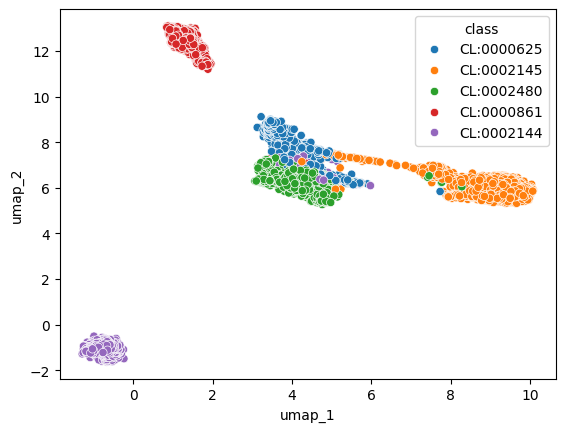

In [40]:
import seaborn as sns

sns.scatterplot(df, x='umap_1', y='umap_2', hue='class')

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import make_pipeline

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y[indices][:10000])

X = df[['umap_1', 'umap_2','umap_3','umap_4','umap_5']]

X_train, X_test, y_train, y_test = train_test_split(np.array(X), y_encoded)

pipe = make_pipeline(StandardScaler(), LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=200))

pipe.fit(X_train, y_train)

/Users/Federick.Farrell/venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(max_iter=200, multi_class='multinomial'))])

In [42]:
print(pipe.score(X_train, y_train))
print(pipe.score(X_test, y_test))

0.9608
0.9628


In [43]:
from sklearn.ensemble import RandomForestClassifier

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y[indices][:10000])

X = df[['umap_1', 'umap_2','umap_3','umap_4','umap_5']]
X_train, X_test, y_train, y_test = train_test_split(np.array(X), y_encoded)

pipe = make_pipeline(StandardScaler(), RandomForestClassifier())

pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier', RandomForestClassifier())])

In [44]:
print(pipe.score(X_train, y_train))
print(pipe.score(X_test, y_test))

1.0
0.9736


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import make_pipeline

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y[indices][:10000])


X_train, X_test, y_train, y_test = train_test_split(np.array(X), y_encoded)

pipe = make_pipeline(StandardScaler(), LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=200))

pipe.fit(X_train, y_train)

/Users/Federick.Farrell/venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(max_iter=200, multi_class='multinomial'))])

In [24]:
print(pipe.score(X_train, y_train))
print(pipe.score(X_test, y_test))

1.0
0.9948


In [34]:
coef = pd.DataFrame(pipe.named_steps['logisticregression'].coef_.T)
coef['name'] = list(ad.var['feature_name'])
coef.sort_values(0)

,0,1,2,3,4,name
16144,-0.021783,0.007581,-0.000802,0.000134,0.014870,S100A6
2485,-0.019118,0.017618,-0.007152,-0.005935,0.014587,CST3
10574,-0.018486,0.013256,-0.007687,0.007049,0.005867,S100A11
11320,-0.017070,-0.011205,0.026135,-0.002860,0.004999,IFI27
7025,-0.016848,0.012149,0.010487,-0.003447,-0.002342,RAC1
...,...,...,...,...,...,...
5101,0.028933,-0.000075,-0.009607,-0.008580,-0.010671,CXCR4
4534,0.029436,-0.006744,-0.008447,-0.006117,-0.008127,CD2
1510,0.029857,0.000904,-0.009455,-0.009834,-0.011472,PTPRC
11637,0.030807,-0.007057,-0.009146,-0.007159,-0.007445,CD3D


In [21]:
from sklearn.ensemble import RandomForestClassifier

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y[indices][:10000])


X_train, X_test, y_train, y_test = train_test_split(np.array(X), y_encoded)

pipe = make_pipeline(StandardScaler(), RandomForestClassifier())

pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier', RandomForestClassifier())])

In [22]:
print(pipe.score(X_train, y_train))
print(pipe.score(X_test, y_test))

1.0
0.9936


In [11]:
imp = pipe.named_steps['randomforestclassifier'].feature_importances_
imp

array([6.77509021e-05, 0.00000000e+00, 2.26320496e-05, ...,
       0.00000000e+00, 0.00000000e+00, 1.43987038e-06])

In [20]:
import pandas as pd

genes = ad.var.feature_name
df = pd.DataFrame(zip(range(len(genes)), genes, imp), columns=['index','gene','importance'])

In [21]:
df.sort_values('importance', ascending=False)

,index,gene,importance
6380,6380,SERPINF1,0.005148
6615,6615,PEBP4,0.004685
6048,6048,APOC1,0.004438
1696,1696,FTL,0.004067
11924,11924,SFTPC,0.004014
...,...,...,...
19012,19012,ENSG00000229960.1,0.000000
19013,19013,ENSG00000229961.4,0.000000
19014,19014,ENSG00000229970.3,0.000000
19015,19015,IQCF3,0.000000


In [32]:
reduced_features = list(df.sort_values('importance', ascending=False).head(n=100)['index'])
reduced_features

[6380,
 6615,
 6048,
 1696,
 11924,
 6252,
 16655,
 7023,
 548,
 15697,
 2489,
 12920,
 15670,
 5983,
 15841,
 6573,
 6046,
 14864,
 12522,
 3974,
 12521,
 1850,
 8264,
 15989,
 15032,
 9027,
 5196,
 4670,
 4825,
 9943,
 14404,
 21142,
 447,
 5854,
 24154,
 8065,
 11170,
 5948,
 3041,
 249,
 11902,
 13864,
 2044,
 14657,
 12134,
 10574,
 14899,
 12552,
 11500,
 26162,
 2224,
 303,
 9803,
 9348,
 23158,
 11637,
 214,
 16537,
 2280,
 14368,
 5166,
 16922,
 4371,
 15194,
 12919,
 5193,
 505,
 10892,
 2639,
 12005,
 17761,
 6266,
 8350,
 2485,
 16145,
 11816,
 15835,
 18906,
 220,
 5316,
 16714,
 8800,
 316,
 15547,
 3488,
 15243,
 12773,
 15096,
 10498,
 1384,
 7809,
 15964,
 16363,
 7193,
 2637,
 12307,
 19302,
 6328,
 16745,
 6935]

In [33]:
X_redc = X[:, reduced_features]

In [34]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y[:10000])


X_train, X_test, y_train, y_test = train_test_split(X_redc, y_encoded)

pipe = make_pipeline(StandardScaler(), LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=200))

pipe.fit(X_train, y_train)

/Users/Federick.Farrell/venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/Federick.Farrell/venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(max_iter=200, multi_class='multinomial'))])

In [35]:
print(pipe.score(X_train, y_train))
print(pipe.score(X_test, y_test))

0.9388
0.8492


In [40]:
from sklearn.ensemble import RandomForestClassifier

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y[:10000])


X_train, X_test, y_train, y_test = train_test_split(X_redc, y_encoded)

pipe = make_pipeline(StandardScaler(), RandomForestClassifier())

pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier', RandomForestClassifier())])

In [41]:
print(pipe.score(X_train, y_train))
print(pipe.score(X_test, y_test))

1.0
0.8556


In [45]:
from xgboost import XGBClassifier

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y[:10000])


X_train, X_test, y_train, y_test = train_test_split(X_redc, y_encoded)

pipe = make_pipeline(StandardScaler(), XGBClassifier())

pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('xgbclassifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None,
                               objective='multi:softprob', ...))])

In [46]:
print(pipe.score(X_train, y_train))
print(pipe.score(X_test, y_test))

1.0
0.8552


In [48]:
from sklearn.neighbors import KNeighborsClassifier

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y[:10000])


X_train, X_test, y_train, y_test = train_test_split(X_redc, y_encoded)

pipe = make_pipeline(StandardScaler(), KNeighborsClassifier())

pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [49]:
print(pipe.score(X_train, y_train))
print(pipe.score(X_test, y_test))

0.892
0.8392


In [51]:
y.value_counts()

cell_type_ontology_term_id
CL:0002633    80113
CL:0000583    78816
CL:0002063    62405
CL:0000158    36023
CL:0002480    35833
CL:0002145    35225
CL:0000625    29074
CL:0000861    28223
CL:0002144    23205
CL:0000624    21285
CL:0000860    17695
CL:0000623    16978
CL:0002543    12975
CL:4028006    10321
CL:0002399     9133
CL:0000875     8834
CL:0002062     7937
CL:1001568     7391
CL:0000097     6623
CL:0005012     5873
CL:4028004     5182
CL:1001603     4805
CL:4030023     4600
CL:0002138     4595
CL:0000236     4511
CL:0002632     4393
CL:0009089     3032
CL:0019019     2996
CL:0000786     1773
CL:1000312     1670
CL:2000093     1573
CL:0000313     1472
CL:0010003     1440
CL:0019001     1417
CL:0000622     1274
CL:0019003      968
CL:0000186      716
CL:0005006      561
CL:0000192      556
CL:0000784      552
CL:0000319      537
CL:0000084      500
CL:0000499      335
CL:0000990      322
CL:0000451      312
CL:0000057      276
CL:0000077      230
CL:0002075      165
CL:1000223   